
# Problem Statement: 

To perform EDA on the dataset and derive useful relations and build a ML model to predict approximate number of daily positive cases to expect

We are taking dataset for Pune city, one of the worst hit city and carry out analysis for the same. 

Reliable dataset refrences that you can refer for Pune city, Maharashtra, India:
    http://www.cessi.in/coronavirus/pune  (used in this analysis) and https://github.com/ForceGT/PCTApi      

Step1: Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


Step2: Reading dataset

In [2]:
pmc = pd.read_csv('Dataset/pmc.csv')

In [3]:
pmc.head()

,Unnamed: 0,dailysamples,dailyconfirmed,dailyrecovered,dailydeceased,totalcritical,ventilatorpatients,totalsamples,totalconfirmed,totalhospital,totalrecovered,totaldeceased,totalhousesurvey,populationcovered,housescovered,flu,Date
0,1,153,15,0.0,2,NaN,NaN,2231,255,198,26,31,733.0,1930096.0,564875.0,56.0,12.04.2020
1,2,115,33,1.0,2,4.0,NaN,2346,278,218,27,33,751.0,2152692.0,633618.0,201.0,13.04.2020
2,3,157,44,1.0,4,6.0,NaN,2503,322,260,28,34,743.0,2355472.0,701736.0,87.0,14.04.2020
3,4,220,55,1.0,4,5.0,NaN,2723,377,307,29,41,795.0,2576501.0,773284.0,110.0,15.04.2020
4,5,265,65,0.0,5,7.0,NaN,2988,442,367,29,46,796.0,2798651.0,844189.0,141.0,16.04.2020


Unnamed 0: is just an index column that came with datset and it's insignificant to analysis, hence we can drop it. 
    Column names seem fine and don't require changes as such

In [4]:
pmc.drop(columns = 'Unnamed: 0', inplace=True)

In [5]:
pmc.columns

Index(['dailysamples', 'dailyconfirmed', 'dailyrecovered', 'dailydeceased',
       'totalcritical', 'ventilatorpatients', 'totalsamples', 'totalconfirmed',
       'totalhospital', 'totalrecovered', 'totaldeceased', 'totalhousesurvey',
       'populationcovered', 'housescovered', 'flu', 'Date'],
      dtype='object')

In [6]:
pmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dailysamples        114 non-null    int64  
 1   dailyconfirmed      114 non-null    int64  
 2   dailyrecovered      113 non-null    float64
 3   dailydeceased       114 non-null    int64  
 4   totalcritical       113 non-null    float64
 5   ventilatorpatients  100 non-null    float64
 6   totalsamples        114 non-null    int64  
 7   totalconfirmed      114 non-null    int64  
 8   totalhospital       114 non-null    int64  
 9   totalrecovered      114 non-null    int64  
 10  totaldeceased       114 non-null    int64  
 11  totalhousesurvey    95 non-null     float64
 12  populationcovered   95 non-null     float64
 13  housescovered       95 non-null     float64
 14  flu                 88 non-null     float64
 15  Date                114 non-null    object 
dtypes: float

In [7]:
pmc.describe()

,dailysamples,dailyconfirmed,dailyrecovered,dailydeceased,totalcritical,ventilatorpatients,totalsamples,totalconfirmed,totalhospital,totalrecovered,totaldeceased,totalhousesurvey,populationcovered,housescovered,flu
count,114.000000,114.000000,113.000000,114.000000,113.000000,100.000000,114.000000,114.000000,114.000000,114.000000,114.000000,95.000000,9.500000e+01,9.500000e+01,88.000000
mean,2591.973684,527.842105,365.353982,12.333333,280.513274,54.060000,93764.605263,15860.473684,5613.719298,9733.807018,500.570175,585.536842,1.280704e+07,3.764612e+06,43.511364
std,2075.367149,524.907402,432.613980,9.078484,219.465671,26.810152,85513.704978,17205.991349,5792.184757,11124.022860,397.535482,254.532939,4.703312e+06,1.374089e+06,38.851321
min,106.000000,15.000000,0.000000,0.000000,4.000000,3.000000,2231.000000,255.000000,198.000000,26.000000,31.000000,70.000000,1.930096e+06,5.648750e+05,2.000000
25%,991.250000,106.250000,84.000000,6.000000,115.000000,41.000000,25049.250000,2758.750000,1355.500000,1251.000000,157.750000,394.500000,1.029958e+07,3.054848e+06,20.000000
50%,1728.000000,283.000000,175.000000,10.000000,208.000000,49.500000,63469.500000,8357.000000,2513.000000,5439.500000,404.500000,589.000000,1.469989e+07,4.310666e+06,33.000000
75%,4060.500000,830.750000,591.000000,16.750000,402.000000,72.500000,144762.250000,23881.250000,8278.000000,14851.250000,765.250000,746.500000,1.635405e+07,4.802446e+06,50.250000
max,7595.000000,1838.000000,2543.000000,41.000000,927.000000,115.000000,297737.000000,60597.000000,19135.000000,42410.000000,1429.000000,1106.000000,1.795215e+07,5.271567e+06,212.000000


We will check for any NaN or null values in the dataset

In [8]:
pmc.isna().sum()

dailysamples           0
dailyconfirmed         0
dailyrecovered         1
dailydeceased          0
totalcritical          1
ventilatorpatients    14
totalsamples           0
totalconfirmed         0
totalhospital          0
totalrecovered         0
totaldeceased          0
totalhousesurvey      19
populationcovered     19
housescovered         19
flu                   26
Date                   0
dtype: int64

total ventilators and total criticals are being kept as such since it is a time series and maybe not everyday there were critical patients, is still a safe assumption to make

Total house surveys, population covered, houses covered, flu  can be filled with mean average value

In [9]:
pmc['ventilatorpatients']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
109    100.0
110     97.0
111     98.0
112      NaN
113      NaN
Name: ventilatorpatients, Length: 114, dtype: float64

In [10]:
pmc

,dailysamples,dailyconfirmed,dailyrecovered,dailydeceased,totalcritical,ventilatorpatients,totalsamples,totalconfirmed,totalhospital,totalrecovered,totaldeceased,totalhousesurvey,populationcovered,housescovered,flu,Date
0,153,15,0.0,2,NaN,NaN,2231,255,198,26,31,733.0,1930096.0,564875.0,56.0,12.04.2020
1,115,33,1.0,2,4.0,NaN,2346,278,218,27,33,751.0,2152692.0,633618.0,201.0,13.04.2020
2,157,44,1.0,4,6.0,NaN,2503,322,260,28,34,743.0,2355472.0,701736.0,87.0,14.04.2020
3,220,55,1.0,4,5.0,NaN,2723,377,307,29,41,795.0,2576501.0,773284.0,110.0,15.04.2020
4,265,65,0.0,5,7.0,NaN,2988,442,367,29,46,796.0,2798651.0,844189.0,141.0,16.04.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,5863,1506,1791.0,23,638.0,100.0,279255,55761,17512,36914,1335,638.0,17756739.0,5211336.0,14.0,1.08.2020
110,3620,1271,1203.0,31,639.0,97.0,281840,57523,18040,38117,1366,294.0,17807999.0,5226226.0,14.0,2.08.2020
111,4604,1270,1822.0,18,633.0,98.0,286444,58304,16981,39939,1384,NaN,NaN,NaN,NaN,3.08.2020
112,5595,1192,1312.0,28,656.0,NaN,292039,59496,16833,41251,1412,582.0,17891452.0,5252645.0,19.0,4.08.2020


In [11]:
pmc.head(30)

,dailysamples,dailyconfirmed,dailyrecovered,dailydeceased,totalcritical,ventilatorpatients,totalsamples,totalconfirmed,totalhospital,totalrecovered,totaldeceased,totalhousesurvey,populationcovered,housescovered,flu,Date
0,153,15,0.0,2,NaN,NaN,2231,255,198,26,31,733.0,1930096.0,564875.0,56.0,12.04.2020
1,115,33,1.0,2,4.0,NaN,2346,278,218,27,33,751.0,2152692.0,633618.0,201.0,13.04.2020
2,157,44,1.0,4,6.0,NaN,2503,322,260,28,34,743.0,2355472.0,701736.0,87.0,14.04.2020
3,220,55,1.0,4,5.0,NaN,2723,377,307,29,41,795.0,2576501.0,773284.0,110.0,15.04.2020
4,265,65,0.0,5,7.0,NaN,2988,442,367,29,46,796.0,2798651.0,844189.0,141.0,16.04.2020
5,256,59,4.0,3,10.0,NaN,3244,501,421,33,47,763.0,3092727.0,923870.0,89.0,17.04.2020
6,362,43,4.0,2,8.0,NaN,3606,544,459,37,48,NaN,NaN,NaN,NaN,18.04.2020
7,181,42,18.0,0,15.0,NaN,3787,586,482,55,49,NaN,NaN,NaN,NaN,19.04.2020
8,182,80,13.0,0,14.0,NaN,3969,666,548,68,50,739.0,3737021.0,1083265.0,140.0,20.04.2020
9,340,42,19.0,2,15.0,NaN,4309,708,569,87,52,750.0,3981330.0,1159283.0,131.0,21.04.2020


We will be filling null values of Total house surveys, population covered, houses covered with mean value. We could have dropped or predicted, but dataset is small so it seemed better approach

In [12]:
pmc['totalhousesurvey'].mean()

585.5368421052632

In [13]:
pmc['totalhousesurvey'] = pmc['totalhousesurvey'].fillna(586)

In [14]:
pmc['totalhousesurvey'].isna().sum()

0

In [15]:
pmc['populationcovered'].mean()

12807040.147368422

In [16]:
pmc['populationcovered'] = pmc['populationcovered'].fillna(12807040)

In [17]:
pmc['populationcovered'].isna().sum()

0

In [18]:
pmc['housescovered'].mean()

3764612.0631578946

In [19]:
pmc['housescovered'] = pmc['housescovered'].fillna(12807040)

In [20]:
pmc['housescovered'].isna().sum()

0

In [21]:
pmc['flu'].mean()

43.51136363636363

In [22]:
pmc['flu'] = pmc['flu'].fillna(44)

In [23]:
pmc.flu.isna().sum()

0

In [24]:
pmc.head(30)

,dailysamples,dailyconfirmed,dailyrecovered,dailydeceased,totalcritical,ventilatorpatients,totalsamples,totalconfirmed,totalhospital,totalrecovered,totaldeceased,totalhousesurvey,populationcovered,housescovered,flu,Date
0,153,15,0.0,2,NaN,NaN,2231,255,198,26,31,733.0,1930096.0,564875.0,56.0,12.04.2020
1,115,33,1.0,2,4.0,NaN,2346,278,218,27,33,751.0,2152692.0,633618.0,201.0,13.04.2020
2,157,44,1.0,4,6.0,NaN,2503,322,260,28,34,743.0,2355472.0,701736.0,87.0,14.04.2020
3,220,55,1.0,4,5.0,NaN,2723,377,307,29,41,795.0,2576501.0,773284.0,110.0,15.04.2020
4,265,65,0.0,5,7.0,NaN,2988,442,367,29,46,796.0,2798651.0,844189.0,141.0,16.04.2020
5,256,59,4.0,3,10.0,NaN,3244,501,421,33,47,763.0,3092727.0,923870.0,89.0,17.04.2020
6,362,43,4.0,2,8.0,NaN,3606,544,459,37,48,586.0,12807040.0,12807040.0,44.0,18.04.2020
7,181,42,18.0,0,15.0,NaN,3787,586,482,55,49,586.0,12807040.0,12807040.0,44.0,19.04.2020
8,182,80,13.0,0,14.0,NaN,3969,666,548,68,50,739.0,3737021.0,1083265.0,140.0,20.04.2020
9,340,42,19.0,2,15.0,NaN,4309,708,569,87,52,750.0,3981330.0,1159283.0,131.0,21.04.2020


We will be doing bivariate analysis, two things we are focussing on is the trends wrt time and how other factors are and to what extent correlated with confirmed cases everyday

In [25]:
corr = pmc.corr()

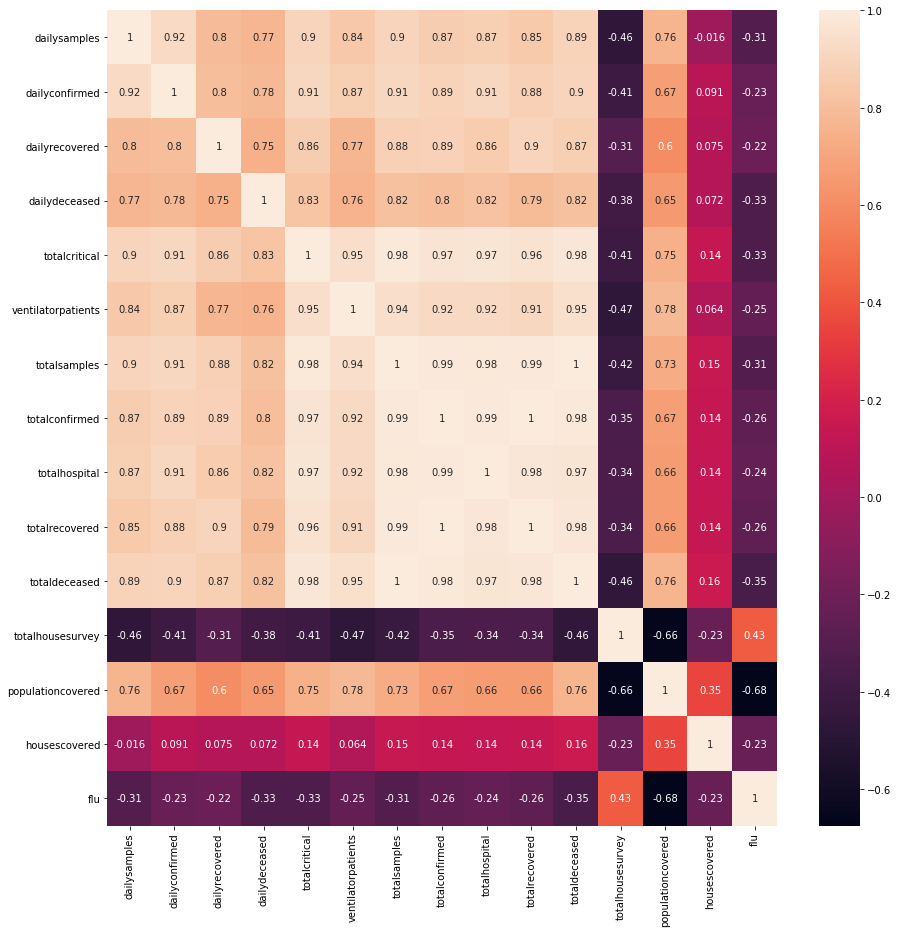

In [26]:
plt.figure(figsize=(15,15))

sns.heatmap(corr,annot= True)

In [27]:
def plots(z):
    plt.figure(figsize=(30,10))
    sns.scatterplot(x=pmc['Date'],y=pmc[z])
    
    plt.xticks(rotation=90)
   

In [28]:
lst = list(pmc.columns)

In [29]:
lst
len(lst)

16

In [30]:
lst.remove('dailyrecovered')
len(lst)


15

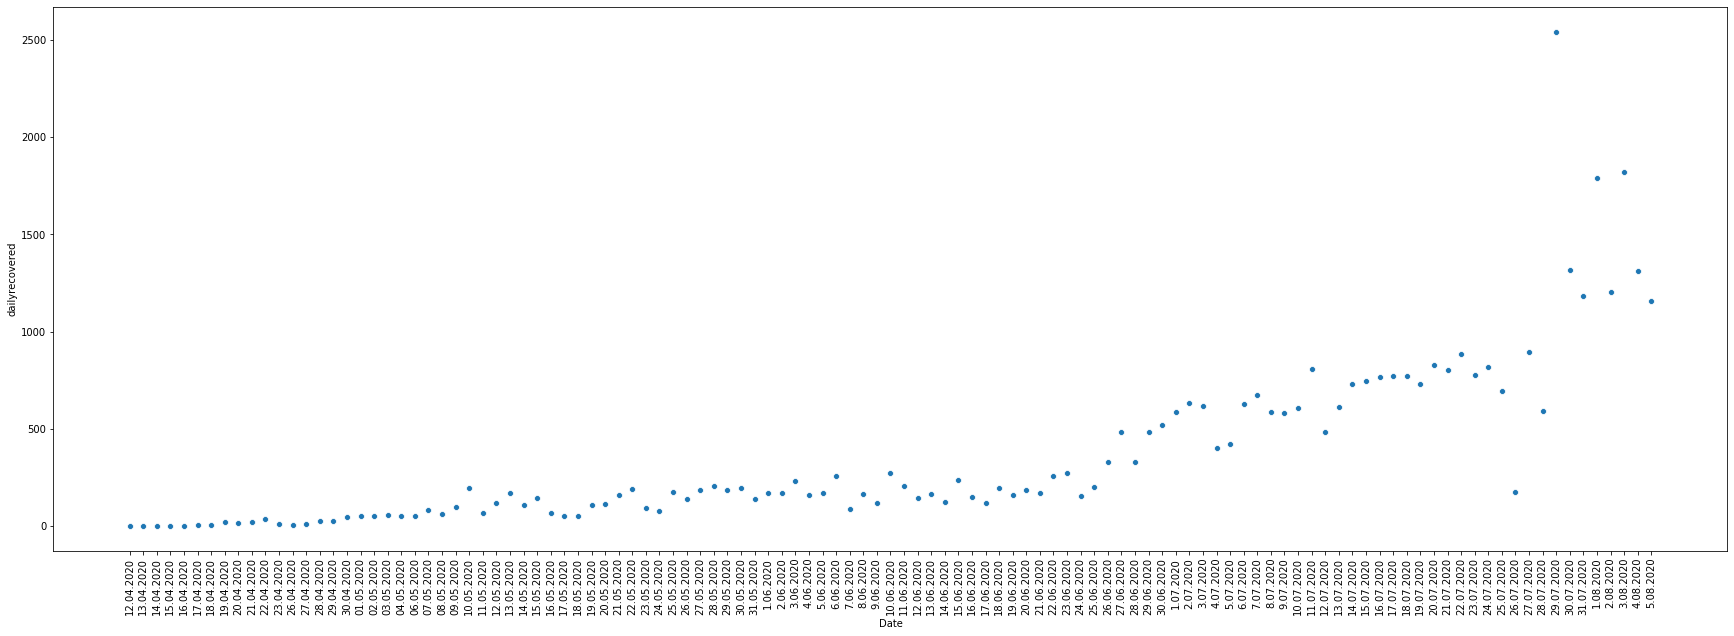

In [31]:
plots('dailyrecovered')

Infrence: Two ways of looking at it
1. linear increase with some outliers, which in this pandemic is expected 
2. polynomial growth with dates, with high chance of overfitting if polynomial regression is applied


In [32]:
lst.remove('ventilatorpatients')
len(lst)

14

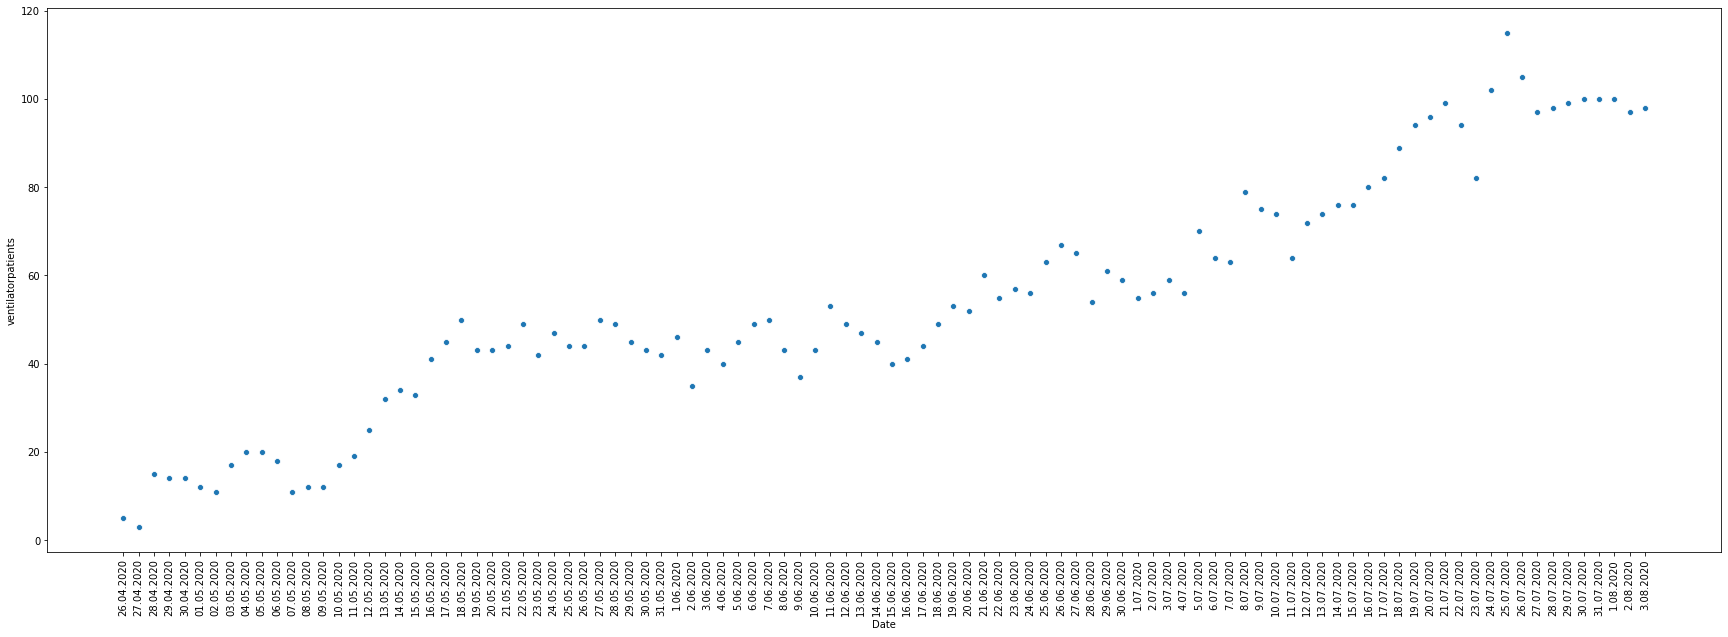

In [33]:
plots('ventilatorpatients')

Infrence: Linear growth in ventilator patients with time 

In [34]:
lst

['dailysamples',
 'dailyconfirmed',
 'dailydeceased',
 'totalcritical',
 'totalsamples',
 'totalconfirmed',
 'totalhospital',
 'totalrecovered',
 'totaldeceased',
 'totalhousesurvey',
 'populationcovered',
 'housescovered',
 'flu',
 'Date']

In [35]:
lst.remove('dailysamples')

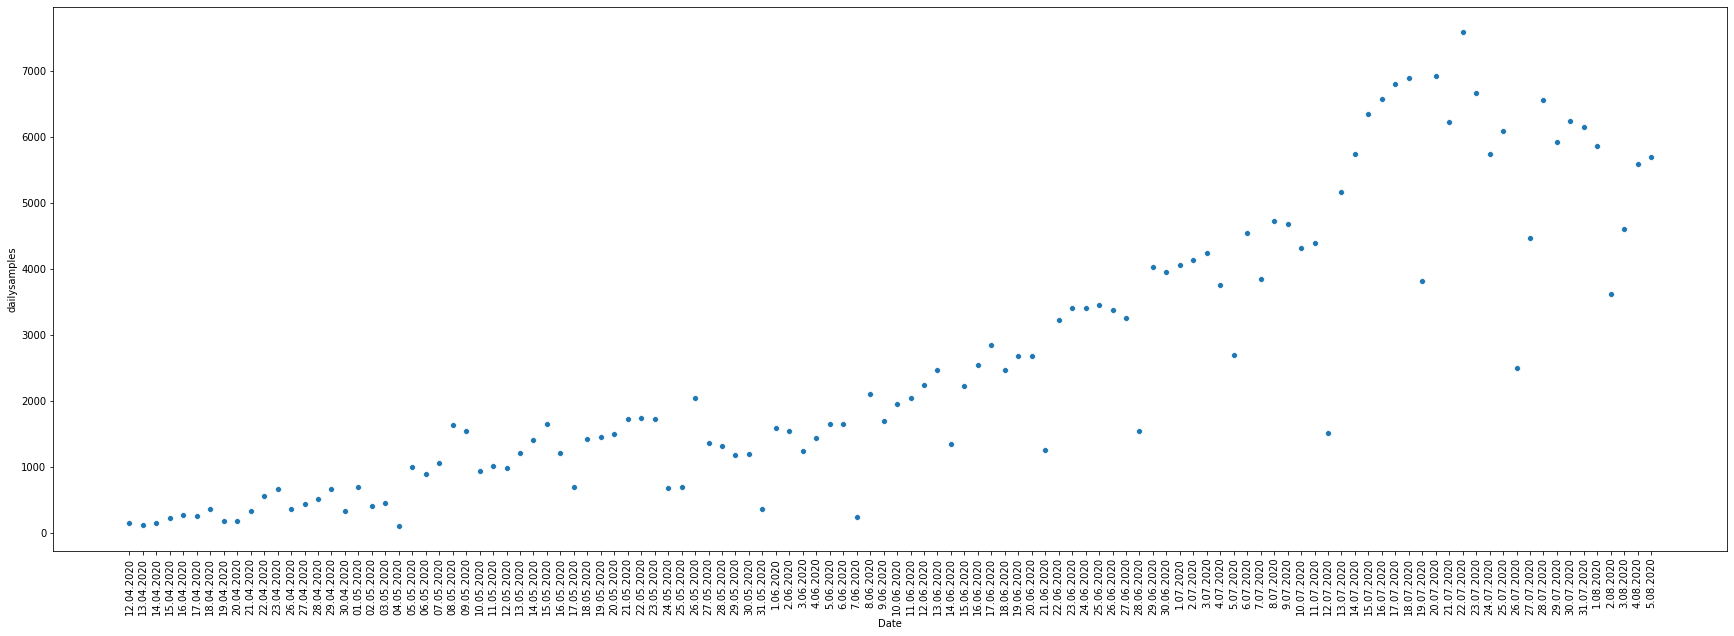

In [36]:
plots('dailysamples')

# CRUX 

If we take a closer look towards the heatmap and trends obtained so far, we will notice that obviously, all other variables grow with time

There's obviously a high correlation between daily samples and daily confirmed cases, more samples means more cases and the growth curve in that area is something we can exploit to give us a number just with certain accuracy. We know that cases will rise, but now it will be providing us with a number based on trends it observed, so we will be definitely better prepared, be it from hopital beds to medical supplies. 

# Interesting trends 

1. daily sample vs daily confirmed
2. daily sample vs daily ventilator patients 


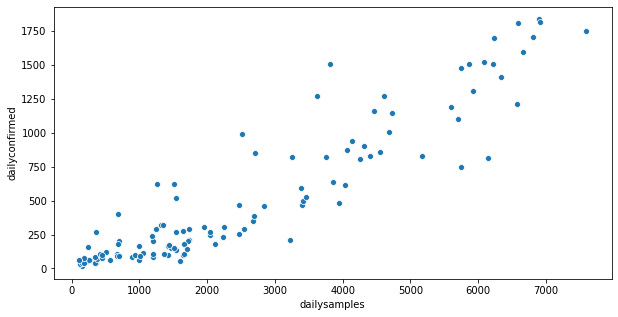

In [40]:
plt.figure(figsize=(10,5))

x = pmc['dailysamples']
y = pmc['dailyconfirmed']

sns.scatterplot(x,y)

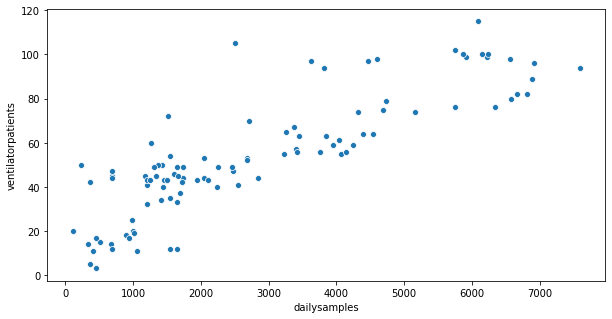

In [42]:
plt.figure(figsize=(10,5))

x = pmc['dailysamples']
y = pmc['ventilatorpatients']

sns.scatterplot(x,y)

In [63]:
df1 = pmc[['dailysamples','dailyconfirmed','Date','ventilatorpatients']]


In [64]:
df1

,dailysamples,dailyconfirmed,Date,ventilatorpatients
0,153,15,12.04.2020,NaN
1,115,33,13.04.2020,NaN
2,157,44,14.04.2020,NaN
3,220,55,15.04.2020,NaN
4,265,65,16.04.2020,NaN
...,...,...,...,...
109,5863,1506,1.08.2020,100.0
110,3620,1271,2.08.2020,97.0
111,4604,1270,3.08.2020,98.0
112,5595,1192,4.08.2020,NaN


In [77]:
X  = np.array(df1['dailysamples']).reshape(-1,1)

y = np.array(df1['dailyconfirmed']).reshape(-1,1)

from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
 
lin.fit(X,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

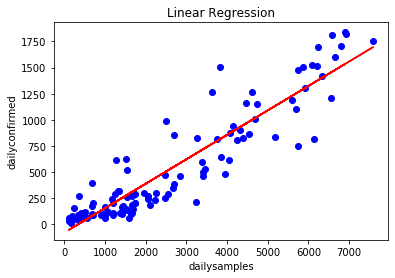

In [91]:

# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('dailysamples') 
plt.ylabel('dailyconfirmed') 
  
plt.show() 


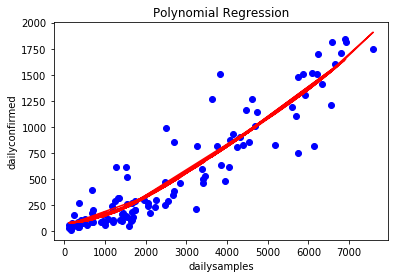

In [94]:

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('dailysamples') 
plt.ylabel('dailyconfirmed') 
  
plt.show() 


Polynomial regression with degree 4 seems a better fit for predicting values of daily confirmed cases

In [98]:
X = np.array(df1['dailysamples']).reshape(-1, 1) 
y = np.array(df1['dailyconfirmed']).reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

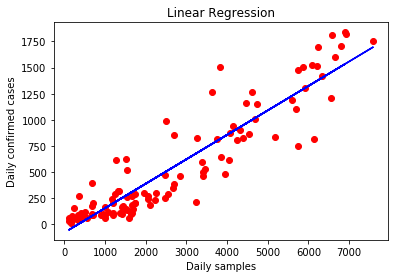

In [107]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Daily samples')
    plt.ylabel('Daily confirmed cases')
    plt.show()
    return
viz_linear()

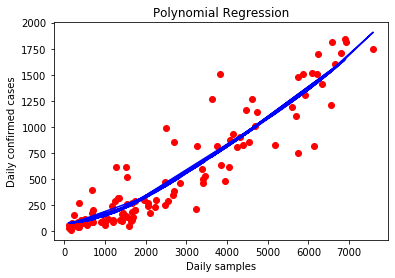

In [108]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('Daily samples')
    plt.ylabel('Daily confirmed cases')
    plt.show()
    return
viz_polymonial()

In [116]:
# Predicting a new result with Linear Regression
y2 = lin_reg.predict(y_test)
#output should be 249500



In [120]:
# model evaluation 

from sklearn import metrics
print("Mean absolute error : ",metrics.mean_absolute_error(y_test,y2))
print("Mean squared error : ", metrics.mean_squared_error(y_test,y2))
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,y2)))

Mean absolute error :  392.92989659778704
Mean squared error :  271165.6644016373
Root mean squared error:  520.7356953403879


In [114]:
# Predicting a new result with Polymonial Regression
y_pred = pol_reg.predict(poly_reg.fit_transform(y_test))
#output should be 132148.43750003

In [125]:
# model evaluation 

from sklearn import metrics
print("Mean absolute error : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error : ", metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

metrics.explained_variance_score(y_test, y_pred)

Mean absolute error :  312.5411398556705
Mean squared error :  258040.29667236874
Root mean squared error:  507.97666941737464


0.17037661842969976

Demotivating results, aren't they? :)

There were strong outliers in the data, which can't be reduced in this particular case as these outliers are important, show surges. 

Dataset isn't that big, 109 observable entries, so that is also one factor. 

Certain complex models such as cessi developed models will be able to tackle this efficiently as they have access to better dataset

# User input plugin

In [131]:
import numpy

my_array = []

my_array.append(float(input("Enter sample value:")))
my_array = numpy.array(my_array)
#print(numpy.floor(my_array))

x = my_array.reshape(-1,1)

predictions = pol_reg.predict(poly_reg.fit_transform(x))
print('Expected confirm cases can be',numpy.floor((predictions[0][0])))


Enter sample value:8945
Expected confirm cases can be 2613.0
